<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [107]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [108]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off or in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [109]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-12-16 14:06:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2019-12-16 14:06:39 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [110]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [111]:
print(df.shape)
print(df.info())

(346, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
Unnamed: 0        346 non-null int64
Unnamed: 0.1      346 non-null int64
loan_status       346 non-null object
Principal         346 non-null int64
terms             346 non-null int64
effective_date    346 non-null object
due_date          346 non-null object
age               346 non-null int64
education         346 non-null object
Gender            346 non-null object
dtypes: int64(5), object(5)
memory usage: 27.1+ KB
None


### Convert to date time object 

In [112]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
print(df.head())
print(df.info())

   Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  
0 2016-10-07   45  High School or Below    male  
1 2016-10-07   33              Bechalor  female  
2 2016-09-22   27               college    male  
3 2016-10-08   28               college  female  
4 2016-10-08   29               college    male  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
Unnamed: 0        346 non-null int64
Unnamed: 0.1      346 non-null int64
loan_status       346 non-null object
Principal         346 non-

# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [113]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [114]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: - ^C
failed

CondaError: KeyboardInterrupt



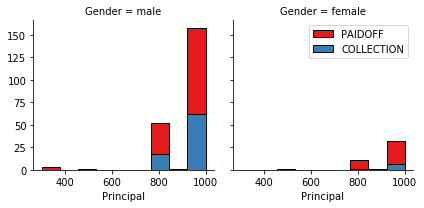

In [115]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

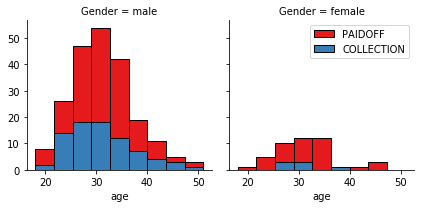

In [116]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

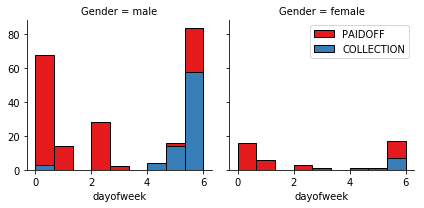

In [117]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [118]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [119]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay their loans while only 73 % of males pay their loan


Lets convert male to 0 and female to 1:


In [120]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [121]:
df['education'].replace(to_replace = ['Bechalor','college'],value=['Bachelor','College'],inplace = True)

## One Hot Encoding  
#### How about education?

In [122]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bachelor              PAIDOFF        0.750000
                      COLLECTION     0.250000
College               PAIDOFF        0.765101
                      COLLECTION     0.234899
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [123]:
df[['Principal','terms','age','Gender','weekend','education']].head()

,Principal,terms,age,Gender,weekend,education
0,1000,30,45,0,0,High School or Below
1,1000,30,33,1,0,Bachelor
2,1000,15,27,0,0,College
3,1000,30,28,1,1,College
4,1000,30,29,0,1,College


#### Use one hot encoding technique to convert categorical variables to binary variables and append them to the feature Data Frame 

In [124]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bachelor,College,High School or Below
0,1000,30,45,0,0,0,0,1
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,1,0
3,1000,30,28,1,1,0,1,0
4,1000,30,29,0,1,0,1,0


### Feature selection

Lets defind feature sets, X:

In [125]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bachelor,College,High School or Below
0,1000,30,45,0,0,0,0,1
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,1,0
3,1000,30,28,1,1,0,1,0
4,1000,30,29,0,1,0,1,0


What are our lables?

In [126]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [127]:
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062, -0.86968108,  1.13639374],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.86968108, -0.87997669],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062,  1.14984679, -0.87997669],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062,  1.14984679, -0.87997669],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062,  1.14984679, -0.87997669]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [128]:
#Splitting the data into training set and testing set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x ,y, test_size = 0.2, random_state = 4)
print('Train Set:', x_train.shape , y_train.shape)
print('Test Set:', x_test.shape, y_test.shape)

Train Set: (276, 8) (276,)
Test Set: (70, 8) (70,)


In [129]:
#Importing k-nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Calculate Accuracy of KNN for different K
Ktest = 10
mean_acc = np.zeros((Ktest-1))
std_acc = np.zeros((Ktest-1))
ConfusionMx = [];
for n in range(1,Ktest):
    neighbor = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_hat = neighbor.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,y_hat)
    std_acc[n-1] = np.std(y_hat == y_test)/np.sqrt(y_hat.shape[0])
    
print("Mean Accuracy:",mean_acc)

Mean Accuracy: [0.67142857 0.65714286 0.71428571 0.68571429 0.75714286 0.71428571
 0.78571429 0.75714286 0.75714286]


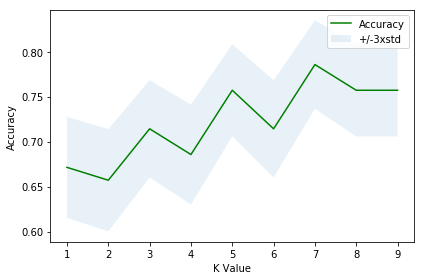

In [130]:
#Plotting Accuracy graph to find the best K Value

plt.plot(range(1,Ktest),mean_acc,'g')
plt.fill_between(range(1,Ktest),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy','+/-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('K Value')
plt.tight_layout()
plt.show()

In [131]:
print("The Best accuracy is:", mean_acc.max(), "at K Value:",mean_acc.argmax()+1)

The Best accuracy is: 0.7857142857142857 at K Value: 7


In [132]:
#As we can see, the higest accuracy is at K=7

k = 7
kbest = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
kbest

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [133]:
#Predicting

y_hat = kbest.predict(x_test)
y_hat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [134]:
#Accuracy Evaluation

print("Train Set Accuracy:%.3f"% metrics.accuracy_score(y_train, kbest.predict(x_train)))
print("Test Set Accuracy:%.3f"% metrics.accuracy_score(y_test, y_hat))

Train Set Accuracy:0.812
Test Set Accuracy:0.786


In [135]:
#Classificaiton report for KNN
classification_rep_knn = classification_report(y_test,y_hat)
print(classification_rep_knn)

              precision    recall  f1-score   support

  COLLECTION       0.50      0.40      0.44        15
     PAIDOFF       0.84      0.89      0.87        55

   micro avg       0.79      0.79      0.79        70
   macro avg       0.67      0.65      0.66        70
weighted avg       0.77      0.79      0.78        70



In [136]:
#F1 score for KNN
f1_score_knn = f1_score(y_test,y_hat, average = 'weighted')
print("F1 score for KNN:",f1_score_knn)

#Jaccard similarity index for KNN
jss_knn = jaccard_similarity_score(y_test,y_hat)
print("Jaccard Similairty index for KNN:",jss_knn)

F1 score for KNN: 0.7766540244416351
Jaccard Similairty index for KNN: 0.7857142857142857


# Decision Tree

In [137]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#Calculate the number of levels
n=10
mean_acc_tree = np.zeros((n-1))
std_acc_tree = np.zeros((n-1))
ConfusionMx = [];

for i in range(1,n):
    test_tree = DecisionTreeClassifier(criterion = "entropy",max_depth = i).fit(x_train,y_train)
    y_hat_tree = test_tree.predict(x_test)
    mean_acc_tree[i-1] = metrics.accuracy_score(y_test,y_hat_tree)
    std_acc_tree[i-1] = np.std(y_hat_tree == y_test)/np.sqrt(y_hat_tree.shape[0])
    
mean_acc_tree

array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.64285714,
       0.77142857, 0.75714286, 0.75714286, 0.65714286])

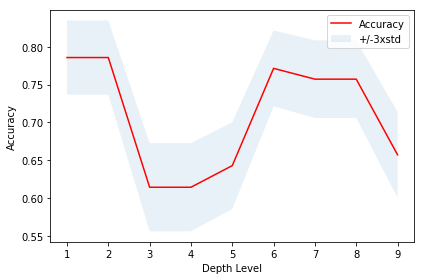

In [138]:
#Plotting accuracy graph to find best depth level

plt.plot(range(1,n),mean_acc_tree,'r')
plt.fill_between(range(1,n),mean_acc_tree-1 * std_acc_tree,mean_acc_tree + 1 * std_acc_tree, alpha = 0.10)
plt.legend(('Accuracy','+/-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Depth Level')
plt.tight_layout()
plt.show()

In [139]:
print("As we can see the optimum accuracy is:",mean_acc_tree[5],"at depth level: 6",)

As we can see the optimum accuracy is: 0.7714285714285715 at depth level: 6


In [140]:
#now building a model with depth level 6
best_depth = 6

loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth = best_depth)
loan_tree.fit(x_train,y_train)
y_hat_tree = loan_tree.predict(x_test)
print(y_test[0:5])
print(y_hat_tree[0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [141]:
#Accuracy Evaluation
print("The decision tree train classifier accuracy is:", metrics.accuracy_score(y_train, loan_tree.predict(x_train)))
print("The decision tree classifier accuracy is:", metrics.accuracy_score(y_test,y_hat_tree))

The decision tree train classifier accuracy is: 0.7753623188405797
The decision tree classifier accuracy is: 0.7714285714285715


In [142]:
#Classification Report of Decision Tree
classification_rep_tree = classification_report(y_test,y_hat_tree)
print(classification_rep_tree)

              precision    recall  f1-score   support

  COLLECTION       0.33      0.07      0.11        15
     PAIDOFF       0.79      0.96      0.87        55

   micro avg       0.77      0.77      0.77        70
   macro avg       0.56      0.52      0.49        70
weighted avg       0.69      0.77      0.71        70



In [143]:
#f1 Score of Decision Tree
f1_score_tree = f1_score(y_test,y_hat_tree,average = 'weighted')
print("F1 Score:",f1_score_tree)

#Jaccard Similarity Index of Decision Tree
jss_tree = jaccard_similarity_score(y_test,y_hat_tree)
print("Jaccard Score:", jss_tree)

F1 Score: 0.7064793130366899
Jaccard Score: 0.7714285714285715


# Support Vector Machine

In [144]:
from sklearn import svm

#SVM Linear
loan_svm_1 = svm.SVC(kernel = 'linear',gamma = 'auto').fit(x_train,y_train)
y_hat_svm_1 = loan_svm_1.predict(x_test)
svm_acc_1 = metrics.accuracy_score(y_test,y_hat_svm_1)

#SVM Polynomial
loan_svm_2 = svm.SVC(kernel = 'poly',gamma = 'auto').fit(x_train,y_train)
y_hat_svm_2 = loan_svm_2.predict(x_test)
svm_acc_2 = metrics.accuracy_score(y_test,y_hat_svm_2)

#SVM Radial Basis Function
loan_svm_3 = svm.SVC(kernel = 'rbf',gamma = 'auto').fit(x_train,y_train)
y_hat_svm_3 = loan_svm_3.predict(x_test)
svm_acc_3 = metrics.accuracy_score(y_test, y_hat_svm_3)

#SVM Sigmoid
loan_svm_4 = svm.SVC(kernel = 'sigmoid',gamma = 'auto').fit(x_train,y_train)
y_hat_svm_4 = loan_svm_4.predict(x_test)
svm_acc_4 = metrics.accuracy_score(y_test, y_hat_svm_4)

print("The accuracy score for the SVM Linear Method is:",svm_acc_1)
print("The accuracy score for the SVM Polynomial Method is:",svm_acc_2)
print("The accuracy score for the SVM Radial Base Function Method is:",svm_acc_3)
print("The accuracy score for the SVM Sigmoid Method is:",svm_acc_4)

The accuracy score for the SVM Linear Method is: 0.7857142857142857
The accuracy score for the SVM Polynomial Method is: 0.7714285714285715
The accuracy score for the SVM Radial Base Function Method is: 0.7428571428571429
The accuracy score for the SVM Sigmoid Method is: 0.7428571428571429


In [145]:
np.unique(y_test, return_counts = True)

(array(['COLLECTION', 'PAIDOFF'], dtype=object), array([15, 55]))

In [146]:
np.unique(y_hat_svm_1, return_counts = True)

(array(['PAIDOFF'], dtype=object), array([70]))

In [147]:
np.unique(y_hat_svm_2, return_counts = True)

(array(['COLLECTION', 'PAIDOFF'], dtype=object), array([ 3, 67]))

In [148]:
np.unique(y_hat_svm_3, return_counts = True)

(array(['COLLECTION', 'PAIDOFF'], dtype=object), array([11, 59]))

In [149]:
np.unique(y_hat_svm_4, return_counts = True)

(array(['COLLECTION', 'PAIDOFF'], dtype=object), array([ 5, 65]))

#### As we can see, the most accurate model, the linear SVM has only "Paid-Off" as its value. Therefore, the most optimum model has been developed by the Radial Base Function, i.e, y_hat_svm_3

In [150]:
#Accuracy Evaluation of the RBF SVM

print("Train set Accuracy: ", metrics.accuracy_score(y_train, loan_svm_3.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat_svm_3))

Train set Accuracy:  0.782608695652174
Test set Accuracy:  0.7428571428571429


In [151]:
#Confusion Matrix

classification_rep_svm = classification_report(y_test,y_hat_svm_3)
print(classification_rep_svm)

              precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

   micro avg       0.74      0.74      0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



In [152]:
#f1 Loss of SVM
f1_score_svm = f1_score(y_test,y_hat_svm_3, average = 'weighted')
print("f1_score for svm:",f1_score_svm)

#Jaccard Similarity Index of SVM
jss_svm = jaccard_similarity_score(y_test,y_hat_svm_3)
print("Jaccard similarity index for svm:",jss_svm)

f1_score for svm: 0.7275882012724117
Jaccard similarity index for svm: 0.7428571428571429


# Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
#Logistic Regression using Newton-cg method
loan_lr_1 = LogisticRegression(C = 0.01, solver = 'newton-cg').fit(x_train,y_train)
y_hat_lr_1 = loan_lr_1.predict(x_test)
lr_acc_1 = metrics.accuracy_score(y_test,y_hat_lr_1)

#Logistic Regression using 'lbfgs'
loan_lr_2 = LogisticRegression(C = 0.01, solver = 'lbfgs').fit(x_train,y_train)
y_hat_lr_2 = loan_lr_2.predict(x_test)
lr_acc_2 = metrics.accuracy_score(y_test, y_hat_lr_2)

#Logistic Regression using 'liblinear'
loan_lr_3 = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train,y_train)
y_hat_lr_3 = loan_lr_3.predict(x_test)
lr_acc_3 = metrics.accuracy_score(y_test, y_hat_lr_3)

#Logistic Regression using 'sag'
loan_lr_4 = LogisticRegression(C = 0.01, solver = 'sag').fit(x_train,y_train)
y_hat_lr_4 = loan_lr_4.predict(x_test)
lr_acc_4 = metrics.accuracy_score(y_test, y_hat_lr_4)

#Logistic Regression using ' saga'
loan_lr_5 = LogisticRegression(C = 0.01, solver = 'saga').fit(x_train,y_train)
y_hat_lr_5 = loan_lr_5.predict(x_test)
lr_acc_5 = metrics.accuracy_score(y_test, y_hat_lr_5)

print("The accuracy for Newton-cg Solver:",lr_acc_1)
print("The accuracy for lbfgs Solver:",lr_acc_2)
print("The accuracy for liblinear Solver:",lr_acc_3)
print("The accuracy for sag Solver:",lr_acc_4)
print("The accuracy for saga Solver:",lr_acc_5)

The accuracy for Newton-cg Solver: 0.7857142857142857
The accuracy for lbfgs Solver: 0.7857142857142857
The accuracy for liblinear Solver: 0.6857142857142857
The accuracy for sag Solver: 0.7857142857142857
The accuracy for saga Solver: 0.7857142857142857


In [155]:
np.unique(y_test, return_counts = True)

(array(['COLLECTION', 'PAIDOFF'], dtype=object), array([15, 55]))

In [156]:
np.unique(y_hat_lr_1, return_counts = True)

(array(['PAIDOFF'], dtype=object), array([70]))

In [157]:
np.unique(y_hat_lr_2, return_counts = True)

(array(['PAIDOFF'], dtype=object), array([70]))

In [158]:
np.unique(y_hat_lr_3, return_counts = True)

(array(['COLLECTION', 'PAIDOFF'], dtype=object), array([11, 59]))

In [159]:
np.unique(y_hat_lr_4, return_counts = True)

(array(['PAIDOFF'], dtype=object), array([70]))

In [160]:
np.unique(y_hat_lr_5, return_counts = True)

(array(['PAIDOFF'], dtype=object), array([70]))

### As we can see, only the liblinear solver has included both the output values, "paid-off" and "collection", in its prediction. Therefore, we can proceed with that solver.

In [161]:
#Accuracy Evaluation
print("Train set accuracy with liblinear solver:", metrics.accuracy_score(y_train, loan_lr_3.predict(x_train)))
print("Test set accuracy with liblinear solver:", metrics.accuracy_score(y_test,y_hat_lr_3))

Train set accuracy with liblinear solver: 0.7572463768115942
Test set accuracy with liblinear solver: 0.6857142857142857


In [162]:
#Classification Report
print(classification_report(y_hat_lr_3,y_test))

              precision    recall  f1-score   support

  COLLECTION       0.13      0.18      0.15        11
     PAIDOFF       0.84      0.78      0.81        59

   micro avg       0.69      0.69      0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.73      0.69      0.70        70



In [163]:
#f1 score of Logistic Regression
f1_score_lr = f1_score(y_test, y_hat_lr_3, average= 'weighted')
print("F1 score for Logsitic Regression:",f1_score_lr)

#Jaccard Similarity Index of Logistic Regression
jss_lr = jaccard_similarity_score(y_test,y_hat_lr_3)
print("Jaccard similarity index for Logistic Regression:",jss_lr)

#Log Loss of Logistic Regression
y_hat_lr_3_prob = loan_lr_3.predict_proba(x_test)
log_loss_lr = log_loss(y_test,y_hat_lr_3_prob)
print("Log Loss for Logsistic Regression:", log_loss_lr)

F1 score for Logsitic Regression: 0.6670522459996144
Jaccard similarity index for Logistic Regression: 0.6857142857142857
Log Loss for Logsistic Regression: 0.5772287609479654


# Model Evaluation using Test set

In [164]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## The Model Evaluation of the data has been done along with the corresponding classifier method. Here, I will be calling the variables containing the values of the F1 Score, Jaccard Similarity Index and the Log Loss for all the classifiers and presenting the report in a dataframe table as required by the question.

...

In [165]:
jss = [jss_knn,jss_tree,jss_svm,jss_lr]
f1score = [f1_score_knn,f1_score_tree,f1_score_svm,f1_score_lr]
logloss = ['NA','NA','NA',log_loss_lr]


df_eval = {'Algorithm':['KNN','Decision Tree','SVM','Logistic Regression'],\
          'Jaccard Score': jss, 'F1-Score': f1score, 'Log Loss': logloss}

report = pd.DataFrame(data = df_eval, index = [1,2,3,4])

report

,Algorithm,Jaccard Score,F1-Score,Log Loss
1,KNN,0.785714,0.776654,NA
2,Decision Tree,0.771429,0.706479,NA
3,SVM,0.742857,0.727588,NA
4,Logistic Regression,0.685714,0.667052,0.577229


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>